Laoding the data in Pandas dataframe



In [424]:
%matplotlib inline
import pandas as pd #data processing
import numpy as np # linear algebra
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from google.colab import drive 

#drive.mount('/content/drive')
#df -> data frame
df=pd.read_csv('/content/drive/MyDrive/CS472/Skyserver_SQL2_27_2018 6_51_39 PM.csv')



df head will be used to display a table of information from the dataset

In [425]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


-objid = Object Identifier
-ra = J2000 Right Ascension (r-band)
-dec = J2000 Declination (r-band)
-u = better of DeV/Exp magnitude fit
-g = better of DeV/Exp magnitude fit
-r = better of DeV/Exp magnitude fit
-i = better of DeV/Exp magnitude fit
-z = better of DeV/Exp magnitude fit
-run = Run Number
-rerun = Rerun Number
-camcol = Camera column
-field = Field number
-specobjid = Object Identifier
-class = object class (galaxy, star or quasar object)
-redshift = Final Redshift
-plate = plate number
-mjd = MJD of observation
-fiberid = fiber ID

In [426]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [427]:
def convert(space):
    if space == "STAR":
        return 0
    elif space == "GALAXY":
        return 1
    else :
        return 2

In [428]:
df['class'] = df['class'].apply(convert)

Displaying all the data for each column

In [429]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


Seeing the correlaton below

In [430]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
correl=[]
correl.append( (df.columns))
for i in df.columns:
    correl.append(df['class'].corr(df[i]))
correl

[Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
        'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
       dtype='object'),
 nan,
 0.041189178484010304,
 0.09124866195501323,
 0.28454149449673116,
 0.3573521672647092,
 0.2786782998347906,
 0.2053670083520623,
 0.149444326448753,
 0.10062725638539075,
 nan,
 0.010269071563927047,
 -0.0026101477590745555,
 -0.4660011896549688,
 1.0,
 0.6210459899756999,
 -0.4660038502740184,
 -0.5278029634683566,
 -0.012668507517816906]

In [432]:
POSY = df['class']
POSX = df.drop(['ra','dec','objid','rerun','camcol','field','specobjid','plate','mjd','fiberid','class'], axis=1)

In [433]:
POSX

,u,g,r,i,z,run,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,752,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,752,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,752,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,752,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,752,0.000590
...,...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,1345,0.027583
9996,18.27255,17.43849,17.07692,16.71661,16.69897,1345,0.117772
9997,18.75818,17.77784,17.51872,17.43302,17.42048,1345,-0.000402
9998,18.88287,17.91068,17.53152,17.36284,17.13988,1345,0.014019


In [434]:
POSY

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: class, Length: 10000, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


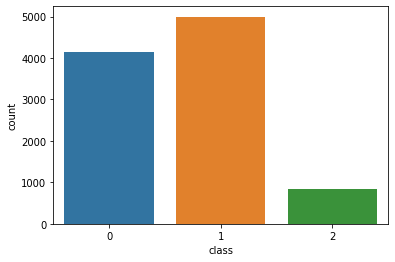

In [435]:
sns.countplot(POSY)

In [436]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
POSX = scaler.fit_transform(POSX)
print('X \n' , POSX[:10])

X 
 [[ 1.03148637 -0.34855938 -0.83728027 -0.94605772 -0.99534154 -0.83806089
  -0.36973112]
 [ 0.05243046 -0.16653251 -0.15415531 -0.08264457 -0.02604308 -0.83806089
  -0.36984929]
 [ 0.92156796  0.86709322  0.59315368  0.44120145  0.31452753 -0.83806089
  -0.05302706]
 [-1.03063038 -0.81362749 -0.63669227 -0.52660429 -0.43092107 -0.83806089
  -0.36999261]
 [-1.29023238 -1.17251944 -0.37676237 -0.02510121  0.15827647 -0.83806089
  -0.36818949]
 [ 0.97991837  1.15913585  1.2396114   1.25349122  1.34542376 -0.83806089
  -0.36889881]
 [ 0.9218576   0.54793007  0.24763882  0.07037522 -0.0442872  -0.83806089
  -0.11185311]
 [ 0.43515363  0.50034225  0.50505868  0.54578672  0.53849374 -0.83806089
  -0.36889818]
 [-0.8607082  -0.4233206  -0.15505443 -0.0401308   0.04415727 -0.83806089
  -0.36947888]
 [ 0.06412468  0.36155588  0.61126719  0.61244768  0.66793136 -0.83806089
  -0.26550833]]


Everything will test out the test/training datasets

In [437]:
from sklearn.model_selection import train_test_split
POSX_train, POSX_test, POSY_train, POSY_test = train_test_split(POSX, POSY, test_size=0.20,  shuffle=True, random_state=12)

DecisionTreeClassifierModel Train Score is :  0.9895
DecisionTreeClassifierModel Test Score is :  0.9855
Confusion Matrix : 
 [[838   2   0]
 [  4 976   7]
 [  0  16 157]]


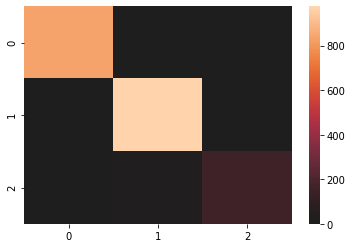

In [438]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=26) #criterion can be entropy
DecisionTreeClassifierModel.fit(POSX_train, POSY_train)

ScoreTrainig = DecisionTreeClassifierModel.score(POSX_train, POSY_train)
ScoreTesting =  DecisionTreeClassifierModel.score(POSX_test, POSY_test)
print('DecisionTreeClassifierModel Train Score is : ' , ScoreTrainig )
print('DecisionTreeClassifierModel Test Score is : ' ,ScoreTesting)


POSY_pred = DecisionTreeClassifierModel.predict(POSX_test)

CM = confusion_matrix(POSY_test, POSY_pred)
print('Confusion Matrix : \n', CM)

sns.heatmap(CM, center = True)
plt.show()

In [439]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [440]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

using graphviz to create a visual for a the decision tree

In [441]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Stevens twee twee")

'Stevens twee twee.pdf'

In [442]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Clf will run the outputs of decision tree using the test datasets